importing libraries

In [2]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from tqdm import tqdm
import gymnasium as gym
import time

initialising the env

In [3]:
env = gym.make("CliffWalking-v0",render_mode="ansi")
n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros((n_states, n_actions))


alpha = 0.2          
gamma = 0.99         
epsilon = 1.0        
epsilon_decay = 0.998
epsilon_min = 0.01
episodes = 10000
Q_learning_rewards = []

QL Training

In [4]:
for episode in tqdm(range(episodes), desc = "QL training"):
    state,_ = env.reset()
    done = False
    total_reward = 0
    #epsilon greedy action selection
    while not done:
        if np.random.uniform(0,1)<epsilon:
            action = np.random.randint(n_actions)
        else:
            action = np.argmax(Q[state])
            
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
        
        state = next_state
        
    Q_learning_rewards.append(total_reward)
    
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
print("training finished!!!")

QL training: 100%|██████████| 10000/10000 [00:11<00:00, 897.05it/s]

training finished!!!


Testing the policy

In [5]:
state, _ = env.reset()
done = False 
total_reward = 0

while not done:
    print(env.render())
    action = np.argmax(Q[state])
    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = next_state
    total_reward += reward

print(f"Total reward: {total_reward}")
env.close()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  x  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  

Sarsa training

In [6]:
sarsa_rewards = []
Q_sarsa = np.zeros((n_states, n_actions))
epsilon = 1.0
for ep in tqdm(range(episodes),desc="Sarsa Training"):
    state, _ = env.reset()
    done = False 
    total_reward = 0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(n_actions)
    else:
        action = np.argmax(Q_sarsa[state])
        
    while not done:
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if np.random.uniform(0, 1) < epsilon:
            next_action = np.random.randint(n_actions)
        else:
            next_action = np.argmax(Q_sarsa[next_state])

        Q_sarsa[state, action] += alpha * (reward + gamma * Q_sarsa[next_state, next_action] - Q_sarsa[state, action])

        state = next_state
        action = next_action

    sarsa_rewards.append(total_reward)
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

Sarsa Training: 100%|██████████| 10000/10000 [01:05<00:00, 152.55it/s]


Testing the policy

In [7]:
state, _ = env.reset()
done = False
total_reward = 0

while not done:
    print(env.render())
    action = np.argmax(Q_sarsa[state])  # Using the SARSA Q-table
    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = next_state
    total_reward += reward

print(f"Total reward: {total_reward}")
env.close()


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


x  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  x  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  x  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  o  x  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T


o  o  

Visualisation of policy - 

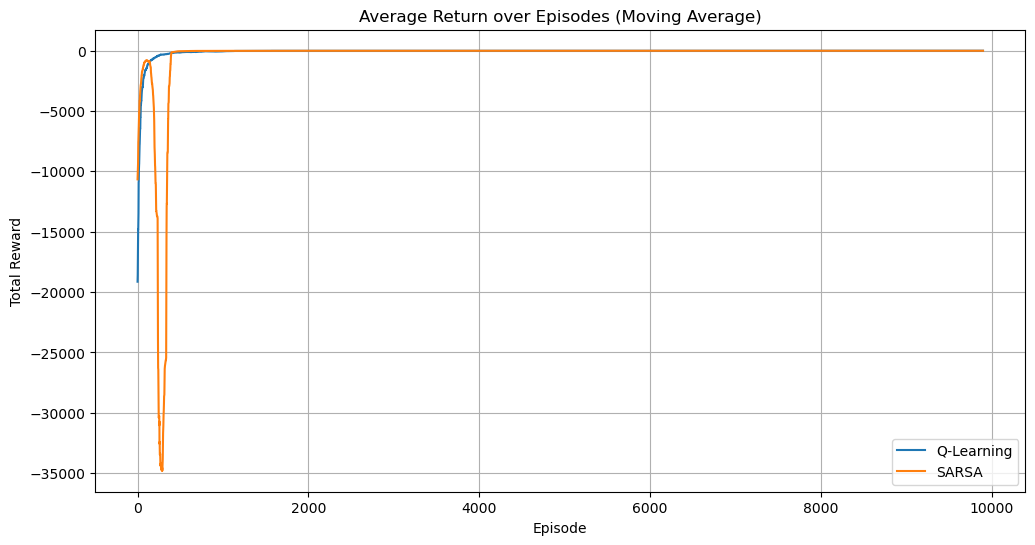

In [10]:

plt.figure(figsize=(12, 6))
window = 100

def moving_avg(data, window):
    return np.convolve(data, np.ones(window) / window, mode='valid')

plt.plot(moving_avg(Q_learning_rewards, window), label='Q-Learning')
plt.plot(moving_avg(sarsa_rewards, window), label='SARSA')
plt.title('Average Return over Episodes (Moving Average)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid()
plt.legend()
plt.show()


summary -

The Q-learning agent typically learns the shortest path to the goal, but this route dangerously skirts the cliff edge, often resulting in higher penalties during training due to falls. In contrast, the SARSA agent, being on-policy and more cautious, learns a safer path that avoids the cliff more reliably, although it may be slightly longer. This behavior illustrates the theoretical distinction: Q-learning’s optimistic updates lead to riskier strategies, while SARSA's conservative, trajectory-aware updates prioritize safety.
Each of their respective paths have been visualised under their testing.